In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [135]:
from data_mining.crypto_prices import daily_price_historical
df_ltc = daily_price_historical('LTC', 'USD')

In [136]:
df_btc = daily_price_historical('BTC', 'USD')

In [137]:
df_eth = daily_price_historical('ETH', 'USD')

In [138]:
df_xrp = daily_price_historical('XRP', 'USD')

In [139]:
df_eos = daily_price_historical('EOS', 'USD')

In [140]:
df_ltc.to_pickle("./data/crypto/ltc_history.pkl")
df_btc.to_pickle("./data/crypto/btc_history.pkl")
df_eth.to_pickle("./data/crypto/eth_history.pkl")
df_xrp.to_pickle("./data/crypto/xrp_history.pkl")
df_eos.to_pickle("./data/crypto/eos_history.pkl")

In [158]:
df_ltc = pd.read_pickle("./data/crypto/ltc_history.pkl")
df_btc = pd.read_pickle("./data/crypto/btc_history.pkl")
df_eth = pd.read_pickle("./data/crypto/eth_history.pkl")
df_xrp = pd.read_pickle("./data/crypto/xrp_history.pkl")
df_eos = pd.read_pickle("./data/crypto/eos_history.pkl")

In [159]:
from sklearn import preprocessing

def normalize(df):
    # Create x, where x the 'scores' column's values as floats
    x = df[['close']].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df['normalized'] = x_scaled
    return df

In [160]:
df_ltc = normalize(df_ltc)
df_btc = normalize(df_btc)
df_eth = normalize(df_eth)
df_xrp = normalize(df_xrp)
df_eos = normalize(df_eos)

In [161]:
df_ltc['date'] = df_ltc['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
df_btc['date'] = df_btc['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
df_eth['date'] = df_eth['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
df_xrp['date'] = df_xrp['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))
df_eos['date'] = df_eos['timestamp'].apply( lambda df : pd.datetime(year=df.year, month=df.month, day=df.day))

In [162]:
df_ltc = df_ltc[['date', 'normalized']]
df_btc = df_btc[['date', 'normalized']]
df_eth = df_eth[['date', 'normalized']]
df_xrp = df_xrp[['date', 'normalized']]
df_eos = df_eos[['date', 'normalized']]

In [163]:
df_ltc.columns = ['date', 'ltc']
df_btc.columns = ['date', 'btc']
df_eth.columns = ['date', 'eth']
df_xrp.columns = ['date', 'xrp']
df_eos.columns = ['date', 'eos']

In [164]:
result = pd.merge(df_ltc, df_btc, on='date')
result = pd.merge(result, df_eth, on='date')
#result = pd.merge(result, df_xrp, on='date')
#result = pd.merge(result, df_eos, on='date')

In [165]:
result.head()

date       ltc       btc       eth
0 2015-08-07  0.008362  0.014362  0.001863
1 2015-08-08  0.007436  0.013365  0.000563
2 2015-08-09  0.007716  0.013637  0.000563
3 2015-08-10  0.007744  0.013608  0.000563
4 2015-08-11  0.008306  0.013904  0.000412

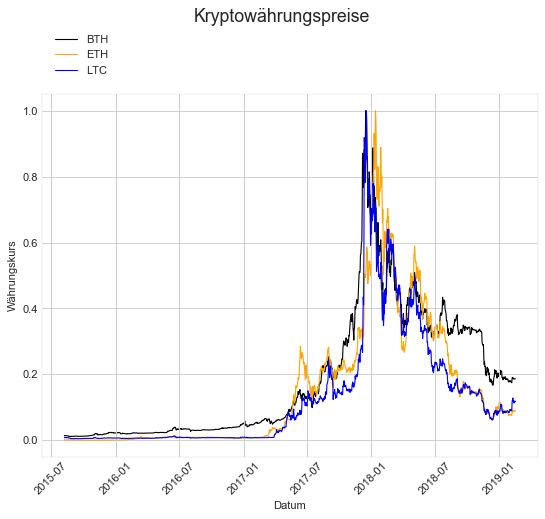

In [171]:
plt.style.use('seaborn-whitegrid')
matplt.rcParams['axes.linewidth'] = 0.1 #set the value globally

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Kryptowährungspreise', fontsize=16, y=1.06)
ax1 = fig.add_subplot(111)

linewidth = 1

plt.plot(result.date, result.btc, color='black', label='BTH', linewidth=linewidth)
plt.xticks(rotation=45)
ax1.set_ylabel('Währungskurs')
ax1.set_xlabel('Datum')

ax2 = ax1.twiny()
ax2.plot(result.date, result.eth, color='orange', label='ETH', linewidth=linewidth)
ax2.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax3 = ax1.twiny()
ax3.plot(result.date, result.ltc, color='blue', label='LTC', linewidth=linewidth)
ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

#ax4 = ax1.twiny()
#ax4.plot(result.index, result.xrp, color='green', label='XRP', linewidth=linewidth)
#ax4.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

#ax5 = ax1.twiny()
#ax5.plot(result.index, result.eos, color='red', label='EOS', linewidth=linewidth)
#ax5.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

fig.legend(loc=2, ncol=1, bbox_to_anchor=(0.07,1.03))
plt.show()

In [156]:
data = result
plt.style.use('seaborn-white')
matplt.rcParams['axes.linewidth'] = 0.1 #set the value globally

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('ML und Regelbasiert kombiniert', fontsize=16, y=1.06)
ax1 = fig.add_subplot(111)
plt.plot(data.index, data.close, color='black', dashes=[6, 2], label='LTC Tagesschlusskurs')
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
ax1.set_ylabel('Währungskurs')
ax1.set_xlabel('Datum')

ax2 = ax1.twinx()
ax2.plot(data.index, data.total_tweets, color='orange', label='Tweets Total')
ax2.set_ylabel('# Tweets', color='black')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('black')
    
ax3 = ax2.twiny()
ax3.plot(data.index, data.ml_rule_positive, color='green', label='Positive Tweets')
ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax3 = ax2.twiny()
ax3.plot(data.index, data.ml_rule_negative, color='red', label='Negative Tweets')
ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax4 = ax2.twiny()
ax4.plot(data.index, data.ml_rule_neutral, color='blue', label='Neutrale Tweets')
ax4.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

fig.legend(loc=2, ncol=2, bbox_to_anchor=(0.07,1.03))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'close'